In [63]:
# Physical constants from Particle Data Group (2024)

# Boson Masses (in GeV/c^2)
MASS_Z = 91.1880       # Z Boson mass ± 0.0020
MASS_Z_ERR = 0.0020

MASS_W = 80.3692       # W Boson mass ± 0.0133
MASS_W_ERR = 0.0133

MASS_H = 125.20        # Higgs Boson mass ± 0.11
MASS_H_ERR = 0.11

# Lepton Masses
MASS_E = 0.000510999   # Electron mass in GeV/c^2
MASS_E_ERR = 0.00000000015

MASS_MU = 0.1056583755 # Muon mass in GeV/c^2
MASS_MU_ERR = 0.000000023

MASS_TAU = 1.77693     # Tau mass in GeV/c^2
MASS_TAU_ERR = 0.00009

### Problem 1.1

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r"C:\Users\chris\Downloads\atlas_z_to_ll (1).csv")
df.head()

,pt1,pt2,eta1,eta2,phi1,phi2,E1,E2
0,33.144898,21.067385,2.176089,-0.139190,0.214251,-2.670418,147.913470,21.271793
1,42.871246,37.205387,0.067116,-0.946074,-0.132653,-2.926308,42.967840,55.135395
2,33.070188,29.222084,-0.366347,-2.146044,2.462502,-0.861610,35.314297,126.647130
3,28.597910,19.120684,1.951096,2.089655,-1.353901,1.913332,102.645260,78.450766
4,49.459629,35.819855,-1.319296,-0.482460,1.621212,-1.404498,99.119836,40.070199


### 1.2

In [52]:
def four_momentum(pt, eta, phi, E):
    px = pt * np.cos(phi)
    py = pt * np.sin(phi)
    pz = pt * np.sinh(eta)
    return px, py, pz, E

# Compute four-momentum components
px1, py1, pz1, E1 = four_momentum(df['pt1'], df['eta1'], df['phi1'], df['E1'])
px2, py2, pz2, E2 = four_momentum(df['pt2'], df['eta2'], df['phi2'], df['E2'])

# Total 4-momentum
px_total = px1 + px2
py_total = py1 + py2
pz_total = pz1 + pz2
E_total = E1 + E2

# Invariant mass
invariant_mass = np.sqrt(E_total**2 - (px_total**2 + py_total**2 + pz_total**2))

print("Calculated invariant masses (GeV):")
print(invariant_mass.head(10))

Calculated invariant masses (GeV):
0     92.150037
1     89.282450
2     88.274725
3     46.788243
4     91.529042
5     92.616991
6     90.955693
7     88.339118
8    138.287014
9     76.182671
dtype: float64


### 1.3

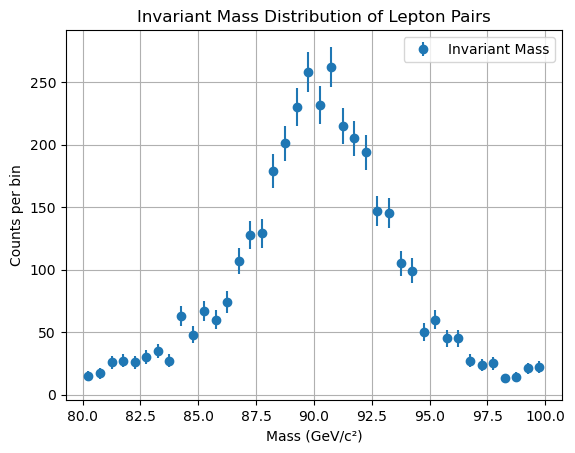

In [53]:
# Histogram binning and plotting
bins = np.linspace(80, 100, 41)
counts, edges = np.histogram(invariant_mass, bins=bins)
bin_centers = 0.5 * (edges[:-1] + edges[1:])
errors = np.sqrt(counts)

#Plot
plt.errorbar(bin_centers, counts, yerr=errors, fmt='o', label='Invariant Mass')
plt.title("Invariant Mass Distribution of Lepton Pairs")
plt.xlabel("Mass (GeV/c²)")
plt.ylabel("Counts per bin")
plt.grid(True)
plt.legend()
plt.show()

### Problem 2.1

In [64]:
import numpy as np
#2500 comes from the N/2 
def breit_wigner(m, m0, Gamma):
    
    return (2500*(Gamma / 2) / ((m - m0)**2 + (Gamma / 2)**2))/ np.pi

def breit_wigner_fit(m, m0, Gamma):
    return (2500*(Gamma / 2) / ((m - m0)**2 + (Gamma / 2)**2))/ np.pi

### 2.2

In [55]:
from scipy.optimize import curve_fit

# Histogram the invariant mass data
bins = np.linspace(80, 100, 41)
counts, edges = np.histogram(invariant_mass, bins=bins)
bin_centers = 0.5 * (edges[:-1] + edges[1:])
errors = np.sqrt(counts)

# Restrict to fit range (87 < m < 93 GeV)
mask = (bin_centers > 87) & (bin_centers < 93)
x_fit = bin_centers[mask]
y_fit = counts[mask]
y_err = errors[mask]

# Initial parameter guesses
initial_guess = [91.2, 2.5]

# Fit the data using curve_fit
popt, pcov = curve_fit(breit_wigner_fit, x_fit, y_fit, p0=initial_guess, sigma=y_err, absolute_sigma=True)
m0_fit, Gamma_fit = popt
perr = np.sqrt(np.diag(pcov))


### 2.3

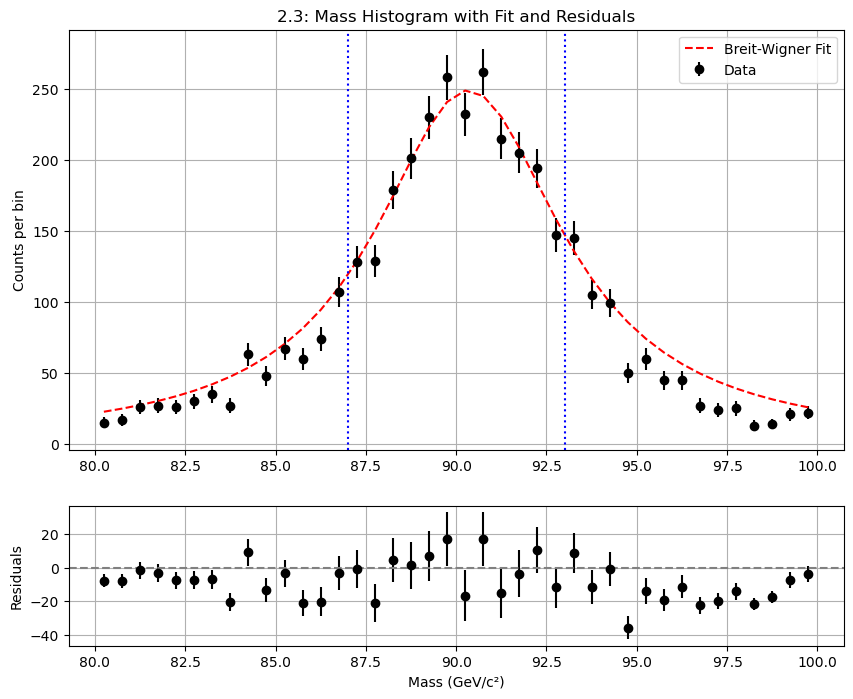

In [56]:
from matplotlib.gridspec import GridSpec

# Create main + residual sub-panel layout
fig = plt.figure(figsize=(10, 8))
gs = GridSpec(2, 1, height_ratios=[3, 1])
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1], sharex=ax0)

# Main plot with data and Breit-Wigner fit
ax0.errorbar(bin_centers, counts, yerr=errors, fmt='o', label='Data', color='black')
ax0.plot(bin_centers, breit_wigner_fit(bin_centers, *popt), linestyle='--', color='red', label='Breit-Wigner Fit')
ax0.axvline(87, color='blue', linestyle='dotted')
ax0.axvline(93, color='blue', linestyle='dotted')
ax0.set_title("2.3: Mass Histogram with Fit and Residuals")
ax0.set_ylabel("Counts per bin")
ax0.legend()
ax0.grid(True)

# Residuals (within fitting range only)
all_residuals = counts - breit_wigner_fit(bin_centers, *popt)
ax1.errorbar(bin_centers, all_residuals, yerr=errors, fmt='o', color='black')
ax1.axhline(0, color='gray', linestyle='--')
ax1.set_xlabel("Mass (GeV/c²)")
ax1.set_ylabel("Residuals")
ax1.grid(True)

### 2.4 


In [57]:
from scipy.stats import chi2

# Calculate expected values
expected = breit_wigner_fit(x_fit, *popt)
chi_squared = np.sum(((y_fit - expected) / y_err) ** 2)
dof = len(y_fit) - len(popt)
reduced_chi_squared = chi_squared / dof
p_value = 1 - chi2.cdf(chi_squared, dof)


print(f"Chi-squared: {chi_squared:.2f}")
print(f"Reduced Chi-squared: {reduced_chi_squared:.2f}")
print(f"Degrees of freedom: {dof}")
print(f"p-value: {p_value:.3f}")

Chi-squared: 9.99
Reduced Chi-squared: 1.00
Degrees of freedom: 10
p-value: 0.442


### 2.5 

In [43]:
print("2.5: Fit results with uncertainties:")
print(f"Best fit mass m0 = {m0_fit:.2f} ± {perr[0]:.2f} GeV")
print(f"Width Γ = {Gamma_fit:.2f} ± {perr[1]:.2f} GeV")

2.5: Fit results with uncertainties:
Best fit mass m0 = 90.34 ± 0.09 GeV
Width Γ = 6.39 ± 0.18 GeV


### 2.6

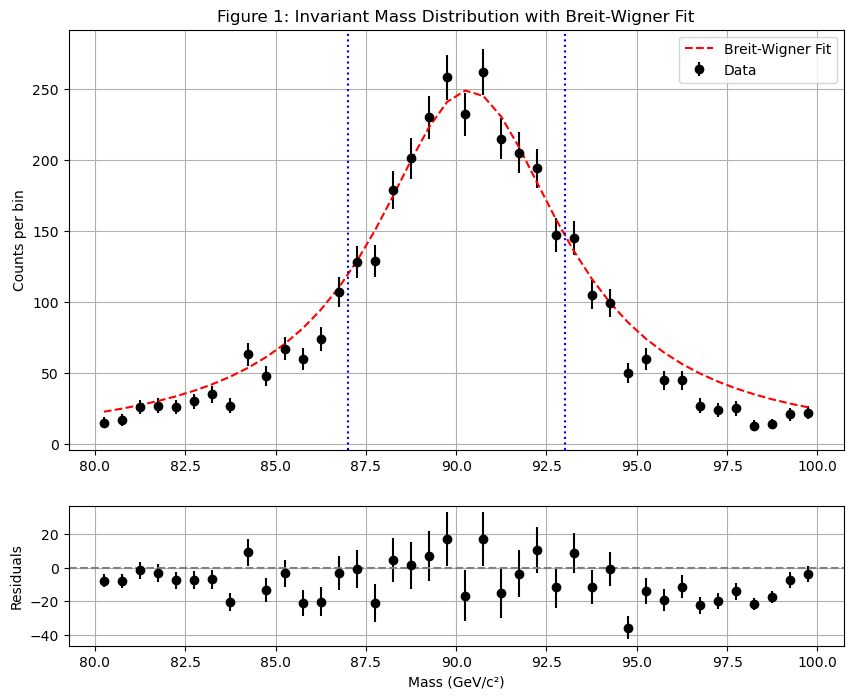

In [44]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 8))
gs = GridSpec(2, 1, height_ratios=[3, 1])
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1], sharex=ax0)

# Main plot
ax0.errorbar(bin_centers, counts, yerr=errors, fmt='o', label='Data', color='black')
ax0.plot(bin_centers, breit_wigner_fit(bin_centers, *popt), linestyle='--', color='red', label='Breit-Wigner Fit')
ax0.axvline(87, color='blue', linestyle='dotted')
ax0.axvline(93, color='blue', linestyle='dotted')
ax0.set_title("Figure 1: Invariant Mass Distribution with Breit-Wigner Fit")
ax0.set_ylabel("Counts per bin")
ax0.legend()
ax0.grid(True)

# Residuals
all_residuals = counts - breit_wigner_fit(bin_centers, *popt)
ax1.errorbar(bin_centers, all_residuals, yerr=errors, fmt='o', color='black')
ax1.axhline(0, color='gray', linestyle='--')
ax1.set_xlabel("Mass (GeV/c²)")
ax1.set_ylabel("Residuals")
ax1.grid(True)

### Problem 3.1 

In [58]:

def breit_wigner(m, m0, Gamma):
    return (2500 * (Gamma / 2)) / ((m - m0)**2 + (Gamma / 2)**2) / np.pi

# Define grid for m0 and Gamma
m0_vals = np.linspace(89, 91, 300)
Gamma_vals = np.linspace(5, 8, 300)
M0, G = np.meshgrid(m0_vals, Gamma_vals)

# Function to compute chi-squared over the grid
def chi_squared_grid(m0_grid, Gamma_grid, x_data, y_data, yerr):
    chi2_vals = np.zeros_like(m0_grid)
    for i in range(m0_grid.shape[0]):
        for j in range(m0_grid.shape[1]):
            expected = breit_wigner(x_data, m0_grid[i, j], Gamma_grid[i, j])
            chi2_vals[i, j] = np.sum(((y_data - expected) / yerr) ** 2)
    return chi2_vals

# Compute chi-squared map on the grid
chi2_map = chi_squared_grid(M0, G, x_fit, y_fit, y_err)

# Find the minimum chi-squared and prepare Δχ² map
chi2_min = np.min(chi2_map)
chi2_map_clipped = np.clip(chi2_map, chi2_min, chi2_min + 35)
delta_chi2_map = chi2_map_clipped - chi2_min

# Locate best fit parameters
min_index = np.unravel_index(np.argmin(chi2_map), chi2_map.shape)
best_m0 = M0[min_index]
best_Gamma = G[min_index]
min_chi2_value = chi2_map[min_index]

best_m0, best_Gamma, min_chi2_value

(np.float64(90.33779264214047),
 np.float64(6.394648829431438),
 np.float64(9.986573371287005))

### 3.2 

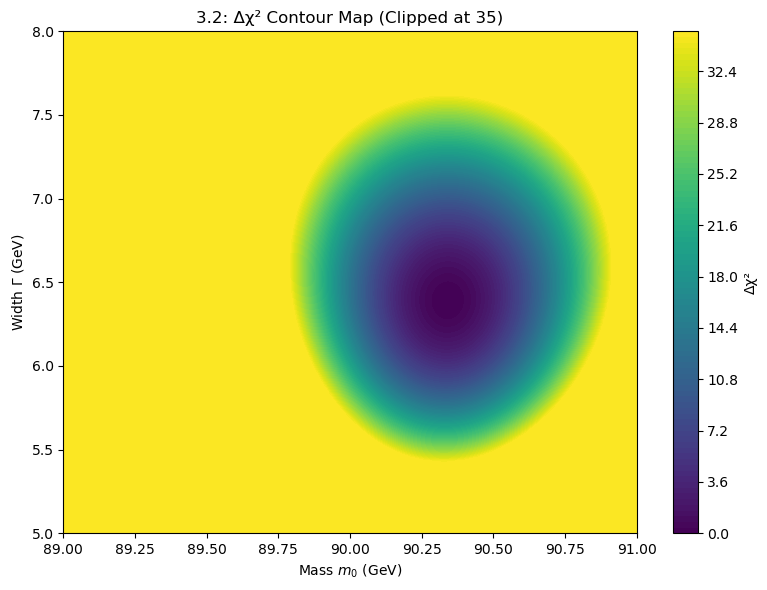

In [59]:
fig, ax = plt.subplots(figsize=(8, 6))

contour = ax.contourf(M0, G, np.clip(delta_chi2_map, 0, 35), levels=100, cmap='viridis')
cbar = plt.colorbar(contour, ax=ax)
cbar.set_label("Δχ²")

ax.set_title("3.2: Δχ² Contour Map (Clipped at 35)")
ax.set_xlabel("Mass $m_0$ (GeV)")
ax.set_ylabel("Width $\\Gamma$ (GeV)")
plt.tight_layout()
plt.show()

### 3.3 

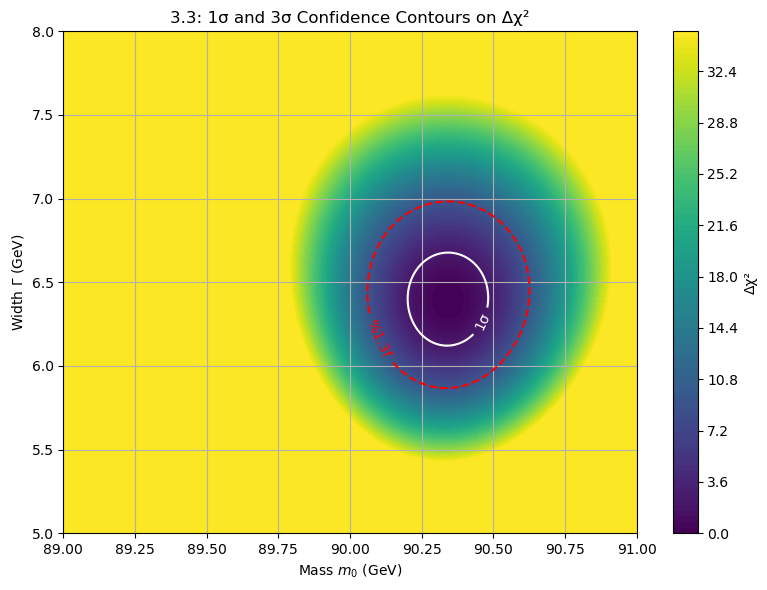

In [67]:
fig, ax = plt.subplots(figsize=(8, 6))

# Base Δχ² contour plot
contourf = ax.contourf(M0, G, np.clip(delta_chi2_map, 0, 35), levels=100, cmap='viridis')
cbar = plt.colorbar(contourf, ax=ax)
cbar.set_label("Δχ²")

# Add 1σ and 3σ contours: for 2 parameters use Δχ² = 2.30, 11.83
levels = [2.30, 9.21]
contour_lines = ax.contour(M0, G, delta_chi2_map, levels=levels, colors=['white', 'red'], linestyles=['solid', 'dashed'])
ax.clabel(contour_lines, fmt={2.30: '1σ', 11.83: '3σ'}, inline=True, fontsize=10)

ax.set_title("3.3: 1σ and 3σ Confidence Contours on Δχ²")
ax.set_xlabel("Mass $m_0$ (GeV)")
ax.set_ylabel("Width $\\Gamma$ (GeV)")
ax.grid(True)
plt.tight_layout()
plt.show()

### Part 3.4

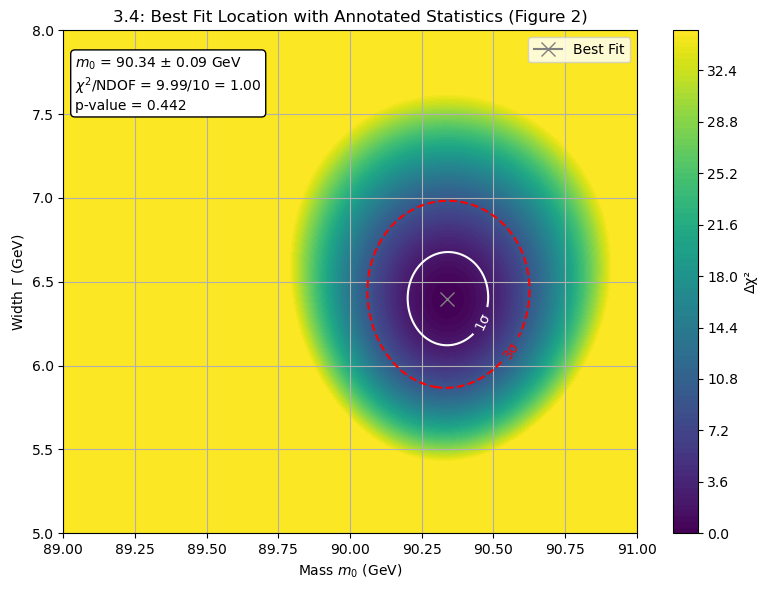

In [70]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot Δχ² filled contour
contourf = ax.contourf(M0, G, delta_chi2_map, levels=100, cmap='viridis')
cbar = plt.colorbar(contourf, ax=ax)
cbar.set_label("Δχ²")

# Mark best-fit point
ax.plot(best_m0, best_Gamma, marker='x', color='grey', markersize=10, label='Best Fit')

# Compute χ², NDOF, and p-value using best fit
expected = breit_wigner(x_fit, best_m0, best_Gamma)
chi2_val = np.sum(((y_fit - expected) / y_err) ** 2)
ndof = len(y_fit) - 2  # 2 fit params: m0, Gamma
p_val = 1 - chi2.cdf(chi2_val, ndof)

# Uncertainty in m0 from original fit (Part 2)
m0_uncertainty = perr[0]  # already from popt in part 2

# Annotation text box
annotation_text = (
    f"$m_0$ = {best_m0:.2f} ± {m0_uncertainty:.2f} GeV\n"
    f"$\\chi^2$/NDOF = {chi2_val:.2f}/{ndof} = {chi2_val/ndof:.2f}\n"
    f"p-value = {p_val:.3f}"
)

ax.annotate(annotation_text,
    xy=(0.02, 0.95), 
    xycoords='axes fraction',
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1),
    ha='left',
    va='top'
)

# Final plot setup
contour_lines = ax.contour(M0, G, delta_chi2_map, levels=levels, colors=['white', 'red'], linestyles=['solid', 'dashed'])
ax.clabel(contour_lines, fmt={2.30: '1σ', 9.21: '3σ'}, inline=True, fontsize=10)

ax.set_title("3.4: Best Fit Location with Annotated Statistics (Figure 2)")
ax.set_xlabel("Mass $m_0$ (GeV)")
ax.set_ylabel("Width $\\Gamma$ (GeV)")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()